In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm



In [10]:
def f(current, E):
    # return -2*(1/current+E)
    
    
    # return -(-5.9*(( 3.57/current)**12 - 2*(3.57/current)**6) + E)
    
#     if current < 10:
    
#         V = 5.9*(( 3.57/current)**12 - 2*(3.57/current)**6)
#         # V = 0 if V >=0 else V
#     else:
#         V=0
        
    V = 5.9*(( 3.57/current)**12 - 2*(3.57/current)**6)
    # return 6.12 / current**12
    # return -2*(1/current+E)
        
    # print("V: ", V)
    
    # V = 0 if V >=0 else V
    
    return -2*(-V + E)

def w_aux(current, h, E):
    return 1 - h**2*f(current+h, E)/12

def dx_aux(current, h, E):
    return 1 - h**2*f(current+h, E)/6

def xh_aux(current, h, E):
    return 2+5*h**2*f(current, E)/6

def numerator(current, h, x_current, dx_current, E):
    return xh_aux(current, h, E) * w_aux(current, -h, E) * x_current + 2*h*dx_current*dx_aux(current, -h, E)

def denominator(current, h, x_current, dx_current, E):
    return w_aux(current, h, E) * dx_aux(current, -h, E) + w_aux(current, -h, E) * dx_aux(current, h, E)

def xh(current, h, x_current, dx_current, E):
    return numerator(current, h, x_current, dx_current, E) / denominator(current, h, x_current, dx_current, E)

In [11]:
f(0.001, 0.5)

5.057089044005158e+43

# forward

In [12]:
E = -0.5

# current = 0.5*3.57
current = 0.0001
h = 0.00001
x_current = 0
dx_current = 0.0007

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(500000)):
    
    x_next = xh(current, h, x_current, dx_current, E=E)
    
    x_next_leap_frog = xh(current, 0.75*h, x_current, dx_current, E=E)
    
    dx_current = (x_next - x_next_leap_frog)/(0.25*h)
    
    x_current = x_next
    current = current + h
    
    r_values.append(current)
    xh_values.append(x_current)
    

100%|███████████████████████████████| 500000/500000 [00:03<00:00, 159213.49it/s]


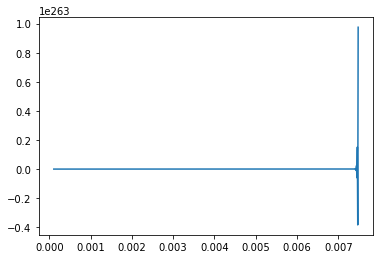

In [13]:
plt.plot(r_values, xh_values)

In [14]:
r_values = np.array(r_values)

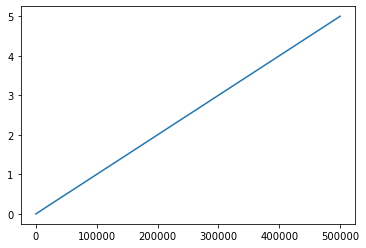

In [15]:
plt.plot(r_values)

In [58]:
exact = r_values * np.exp(-r_values)

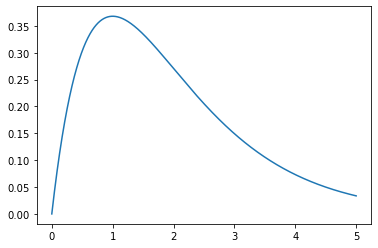

In [59]:
plt.plot(r_values, exact)

In [60]:
r_values

array([1.10000e-04, 1.20000e-04, 1.30000e-04, ..., 5.00008e+00,
       5.00009e+00, 5.00010e+00])

# backward

In [4]:
E = 6
current = 50
h = 0.00001
x_current = 0
dx_current = 0.0007

# x_prev = xh(current, -h, x_current, dx_current)




r_values = []
xh_values = []

for i in tqdm(range(int((current-3) / h))):
    
    x_next = xh(current, -h, x_current, dx_current, E=-0.5)
    
    x_next_leap_frog = xh(current, -0.75*h, x_current, dx_current, E=-0.5)
    
    dx_current = (x_next - x_next_leap_frog)/(-0.25*h)
    
    x_current = x_next
    current = current - h
    
    r_values.append(current)
    xh_values.append(-x_current)
    

100%|█████████████████████████████| 4700000/4700000 [00:31<00:00, 148617.61it/s]


In [5]:
r_values[-1]

2.9999999953400223

In [6]:
np.array([1,2,3])[2:0:-1]

array([3, 2])

In [7]:
len(r_values)

4700000

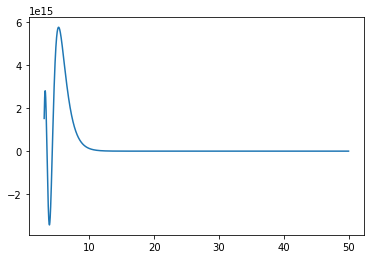

In [8]:
plt.plot(r_values[::-1], xh_values[::-1])

In [9]:
r_values[-1]

2.9999999953400223

In [38]:
xh_values

[7.000000000058334e-09,
 1.4000000000659898e-08,
 2.1000000002519274e-08,
 2.800000000635105e-08,
 3.500000001286982e-08,
 4.200000002279019e-08,
 4.900000003682677e-08,
 5.600000005569412e-08,
 6.300000008010683e-08,
 7.000000011077946e-08,
 7.700000014842668e-08,
 8.400000019376307e-08,
 9.10000002475032e-08,
 9.800000031036164e-08,
 1.0500000038305297e-07,
 1.1200000046629174e-07,
 1.1900000056079257e-07,
 1.2600000066727007e-07,
 1.330000007864389e-07,
 1.4000000091901355e-07,
 1.4700000106570854e-07,
 1.540000012272385e-07,
 1.6100000140431795e-07,
 1.6800000159766144e-07,
 1.7500000180798377e-07,
 1.820000020359994e-07,
 1.890000022824229e-07,
 1.960000025479688e-07,
 2.0300000283335174e-07,
 2.1000000313928627e-07,
 2.1700000346648694e-07,
 2.240000038156685e-07,
 2.310000041875455e-07,
 2.3800000458283244e-07,
 2.45000005002244e-07,
 2.520000054464947e-07,
 2.590000059162993e-07,
 2.6600000641237243e-07,
 2.730000069354287e-07,
 2.8000000748618256e-07,
 2.8700000806534853e-07,


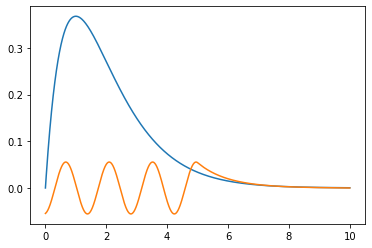

In [39]:
r_values = np.array(r_values)
exact = r_values * np.exp(-r_values)

plt.plot(r_values, exact)
plt.plot(r_values[::-1], xh_values[::-1])

# Shooting Method

In [40]:
def numerov(E, h, current, x_current=0, dx_current=0.007, direction=-1):
    # E = -0.1
    # current = 10
    # h = 0.00001
    # x_current = 0
    # dx_current = 0.0007

    # x_prev = xh(current, -h, x_current, dx_current)

    
    if direction not in [-1, 1]:
        raise Exception("Invalid direction")

    n_steps = int(current / h)

    r_values = np.zeros((n_steps, ), dtype=float)
    xh_values = np.zeros((n_steps, ), dtype=float)

    
    # for i in tqdm(range(n_steps), position=0, leave=True):
    for i in range(n_steps):

        x_next = xh(current, h*direction, x_current, dx_current, E=E)

        x_next_leap_frog = xh(current, 0.75*h*direction, x_current, dx_current, E=E)

        dx_current = (x_next - x_next_leap_frog)/(0.25*h*direction)

        x_current = x_next
        current = current + h * direction

        r_values[::direction][i] = current
        xh_values[::direction][i] = x_current
        
    normalization_factor = np.sqrt((xh_values * xh_values).sum())
    
    xh_values /= normalization_factor
        
    return r_values, xh_values * direction, xh_values[0], xh_values[-1]

In [41]:
E = -0.5
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

r_values, xh_values, u0, un = numerov(E, h, current, x_current=x_current, dx_current=dx_current, direction=-1)

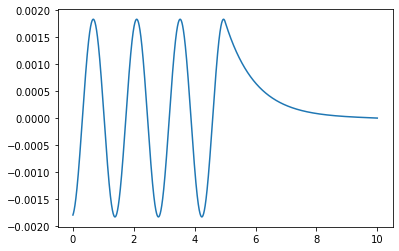

In [42]:
plt.plot(r_values, xh_values)

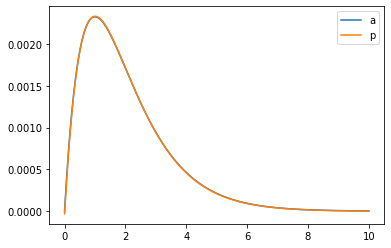

In [20]:
exact = r_values * np.exp(-r_values)
exact /= np.sqrt((exact*exact).sum())
plt.plot(r_values, exact)
plt.legend("exact")
plt.plot(r_values, xh_values)
plt.legend("approx")

In [28]:
E_guess = np.linspace(-0.7, 0.7, int(1.4/0.01))

In [29]:
E_guess

array([-0.7       , -0.68992806, -0.67985612, -0.66978417, -0.65971223,
       -0.64964029, -0.63956835, -0.6294964 , -0.61942446, -0.60935252,
       -0.59928058, -0.58920863, -0.57913669, -0.56906475, -0.55899281,
       -0.54892086, -0.53884892, -0.52877698, -0.51870504, -0.50863309,
       -0.49856115, -0.48848921, -0.47841727, -0.46834532, -0.45827338,
       -0.44820144, -0.4381295 , -0.42805755, -0.41798561, -0.40791367,
       -0.39784173, -0.38776978, -0.37769784, -0.3676259 , -0.35755396,
       -0.34748201, -0.33741007, -0.32733813, -0.31726619, -0.30719424,
       -0.2971223 , -0.28705036, -0.27697842, -0.26690647, -0.25683453,
       -0.24676259, -0.23669065, -0.22661871, -0.21654676, -0.20647482,
       -0.19640288, -0.18633094, -0.17625899, -0.16618705, -0.15611511,
       -0.14604317, -0.13597122, -0.12589928, -0.11582734, -0.1057554 ,
       -0.09568345, -0.08561151, -0.07553957, -0.06546763, -0.05539568,
       -0.04532374, -0.0352518 , -0.02517986, -0.01510791, -0.00

In [33]:
E = -0.5
current = 10
h = 0.00001
x_current = 0
dx_current = 0.0007

_, _, u0_last, _ = numerov(-0.7, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
# for egs in tqdm(E_guess, position=0, leave=True):
for egs in E_guess:
    _, _, u0_current, _ = numerov(egs, h, current, x_current=x_current, dx_current=dx_current, direction=-1)
    
    # print("egs: ", egs, "u_0: ", u0_current)
    
    if u0_current * u0_last < 0:
        print("guess: ", egs)
        
    u0_last = u0_current

guess:  -0.5086330935251798
guess:  -0.11582733812949642
guess:  0.08561151079136686


KeyboardInterrupt: 

In [ ]:
np.logspace(np.log(1e-20), np.log(10), 1000, base=np.e)

In [103]:
def numerov_log(E, current, start=1e-37, end=10, x_current=0, dx_current=0.007, direction=-1, n_steps=1000):
    # E = -0.1
    # current = 10
    # h = 0.00001
    # x_current = 0
    # dx_current = 0.0007

    # x_prev = xh(current, -h, x_current, dx_current)

    
    if direction not in [-1, 1]:
        raise Exception("Invalid direction")

    # n_steps = int(current / h)
    
    grids = np.logspace(np.log(start), np.log(current), n_steps+1, base=np.e)[:]
    # grids = np.linspace(1e-5, current, n_steps+2)[1:]

    r_values = np.zeros((n_steps, ), dtype=float)
    xh_values = np.zeros((n_steps, ), dtype=float)

    
    # for i in tqdm(range(n_steps), position=0, leave=True):
    for i in range(n_steps):

        h = grids[::direction][i+1] -  grids[::direction][i]
        # print("h: ", h)
        
        current = grids[::direction][i]

        x_next = xh(current, h, x_current, dx_current, E=E)

        x_next_leap_frog = xh(current, 0.75*h, x_current, dx_current, E=E)

        dx_current = (x_next - x_next_leap_frog)/(0.25*h)

        x_current = x_next
        # current = current + h * direction

        r_values[::direction][i] = current
        xh_values[::direction][i] = x_current
        
    normalization_factor = np.sqrt((xh_values * xh_values).sum())
    
    xh_values /= normalization_factor
        
    return r_values, xh_values, xh_values[0], xh_values[-1]

In [120]:
E = 6
current = 50
# h = 0.00001
x_current = 0
dx_current = 0.0007

rv, xhv, u0, un = numerov_log(E, current, start=1.5, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=1000)

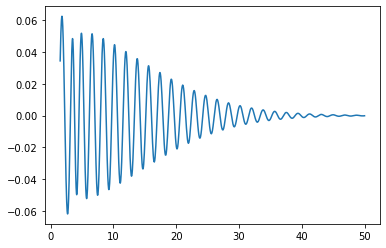

In [121]:
plt.plot(rv, xhv)

In [106]:
np.linspace(1e-5, 10, 200000+2)[1:]

array([5.999970e-05, 1.099994e-04, 1.599991e-04, ..., 9.999900e+00,
       9.999950e+00, 1.000000e+01])

In [107]:
# E = -0.5
E_guess = np.linspace(-0.7, 0, int(0.7/0.0005))
current = 200
# h = 0.00001
x_current = 0
dx_current = 0.0007
start = 1e-20
n_steps = 5000

E_guessed = []
_, _, u0_last, _ = numerov_log(-0.7, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
# for egs in tqdm(E_guess, position=0, leave=True):
for egs in E_guess:
    _, _, u0_current, _ = numerov_log(egs, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # print("egs: ", egs, "u_0: ", u0_current)
    
    if u0_current * u0_last < 0:
        print("guess: ", egs)
        E_guessed.append(egs)
        
    u0_last = u0_current

KeyboardInterrupt: 

In [262]:
E_guessed = np.array(E_guessed)

In [263]:
E_guessed[0] / E_guessed

array([  1.        ,   4.00790514,   9.05357143,  16.0952381 ,
        25.35      ,  36.21428571,  50.7       ,  67.6       ,
        84.5       , 112.66666667, 169.        , 507.        ])

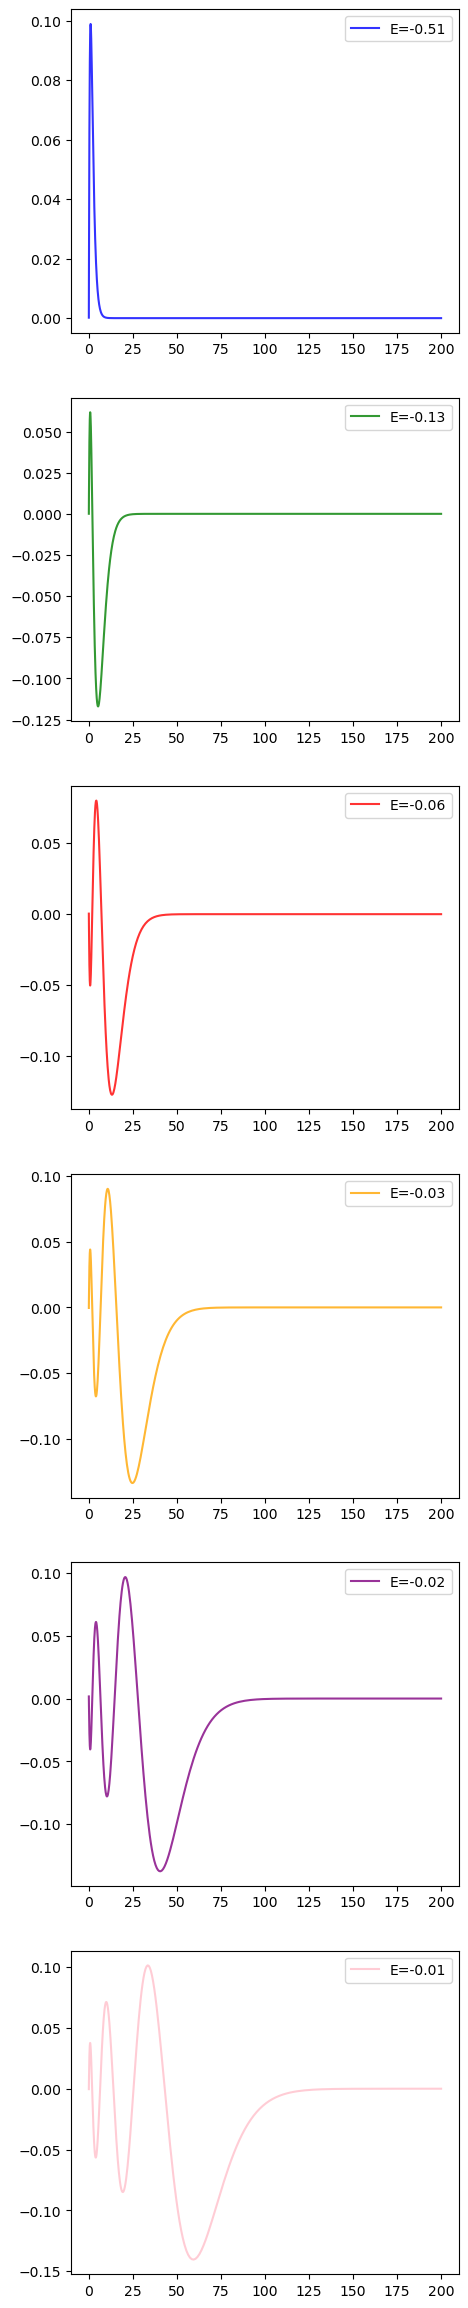

In [272]:
# fig = plt.figure(figsize=(10, 10), dpi=200)
fig, axes = plt.subplots(6, 1, figsize=(5, 30), dpi=100)
legends = []
colors = ["b", "g", "r", "orange", "purple", "pink"]
for i, egs in enumerate(E_guessed[:6]):
    rv, xhv, u0, un = numerov_log(egs, 200, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # plt.plot(rv, xhv, alpha=0.5)
    axes[i].plot(rv, xhv, alpha=0.8, color=colors[i])
    axes[i].legend([f"E={egs: .2f}"])
    # legends.append(f"E={egs: .3f}")
# plt.legend(legends)

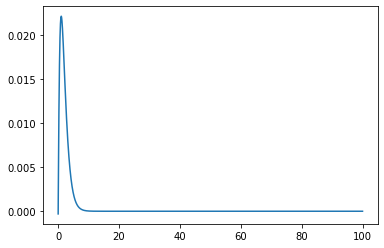

In [165]:
plt.plot(rv, xhv)

# root finding

In [285]:
from scipy.optimize import brentq


find_root = lambda e: numerov_log(e, 200, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)[2]

brentq(find_root, -0.7, -0.4)

-0.5065361432164921

In [288]:
energy_grids = -np.logspace(np.log(0.7), np.log(0.0000001), 100, base=np.e)

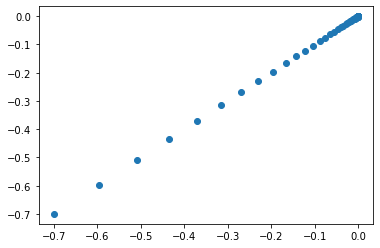

In [289]:
plt.scatter(energy_grids, energy_grids)

In [293]:
# E = -0.5
# E_guess = np.linspace(-0.7, 0, int(0.7/0.0005))
energy_grids = -np.logspace(np.log(0.7), np.log(0.0000001), 100, base=np.e)
current = 200
# h = 0.00001
x_current = 0
dx_current = 0.0007
start = 1e-20
n_steps = 5000

E_guessed = []
E_last = -0.7
_, _, u0_last, _ = numerov_log(E_last, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
# for egs in tqdm(E_guess, position=0, leave=True):
find_root = lambda e: numerov_log(e, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)[2]

for egs in E_guess:
    _, _, u0_current, _ = numerov_log(egs, current, start=start, x_current=x_current, dx_current=dx_current, direction=-1, n_steps=n_steps)
    # print("egs: ", egs, "u_0: ", u0_current)
    
    
    
    if u0_current * u0_last < 0:
        print("guess range: ", E_last, egs)
        
        egs = brentq(find_root, E_last, egs)
        
        
        print("energy level: ", egs)
        
        E_guessed.append(egs)
        
    E_last = egs
        
    u0_last = u0_current

guess range:  -0.5082260371959942 -0.507725321888412
energy level:  -0.5081897865186182
guess range:  -0.12718168812589414 -0.12668097281831192
energy level:  -0.1270419418441074
guess range:  -0.05658082975679546 -0.056080114449213125
energy level:  -0.05645900822366701
guess range:  -0.032045779685264675 -0.03154506437768245
energy level:  -0.031754982139840425
guess range:  -0.020529327610872672 -0.02002861230329045
energy level:  -0.020320547959121537
guess range:  -0.01452074391988556 -0.014020028612303337
energy level:  -0.014109251174614463
guess range:  -0.010515021459227447 -0.010014306151645225
energy level:  -0.010364035913318807
guess range:  -0.008011444921316224 -0.007510729613733891
energy level:  -0.007933176321812964
guess range:  -0.006509298998569446 -0.006008583690987113
energy level:  -0.006255301573804934
guess range:  -0.005007153075822668 -0.0045064377682403345
energy level:  -0.004872366305979085
guess range:  -0.0035050071530758897 -0.0030042918454935563
energ

In [295]:
E_guessed = np.array(E_guessed)

In [296]:
E_guessed[0] / E_guessed

array([  1.        ,   4.00017332,   9.00103991,  16.0034663 ,
        25.00866549,  36.01819687,  49.03396619,  64.05880393,
        81.24145263, 104.30040654, 155.37418114, 393.23719452])

In [ ]:
# guess:  -0.507725321888412
# guess:  -0.12668097281831192
# guess:  -0.056080114449213125
# guess:  -0.03154506437768245
# guess:  -0.02002861230329045
# guess:  -0.014020028612303337
# guess:  -0.010014306151645225
# guess:  -0.007510729613733891
# guess:  -0.006008583690987113
# guess:  -0.0045064377682403345
# guess:  -0.0030042918454935563
# guess:  -0.0010014306151645558

In [297]:
np.sign

<ufunc 'sign'>